In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

In [2]:
#get current directory
currentDirectory = os.getcwd()

dfile = f"{currentDirectory}\deaths.xlsx"
vfile = f"{currentDirectory}\\full_vaccinations.xlsx"


In [3]:
#read excel files and catch the filenotfound error exception
def ReadExcelFile(xfile):
     try:
        readxfile = pd.read_excel(xfile)
        return readxfile

     except FileNotFoundError as fne:
        print(f"File or directory not found  {fne.filename}")
        sys.exit()
    

In [4]:
#read the deaths excel file
readxdfile = ReadExcelFile(dfile)
#read the vaccinations excel file
readxvfile = ReadExcelFile(vfile)

In [5]:
#get the country index value of the excel file
def CountryIndex(conName, excelFilePath):
    index_value = excelFilePath.index[excelFilePath['country'] == conName].tolist()[0]
    return index_value

In [6]:
#get a specific value of any column based on the country index value      
def GetColumnValue(indexValue, columnName, excelFilePath):
    value = excelFilePath.iloc[indexValue][columnName]
    if("," in str(value)):
        newValue = value.replace(",", "")
        return float(newValue)
    else:
        return float(value)

In [7]:
#Convert the first letter of each word in the input to upper-case
def CountryInputToUpper(entryTxt):
    toAList = entryTxt.split(" ")
    wordsToUpper = list(map(lambda words: words.capitalize(), toAList))
    countrytoString = " ".join(wordsToUpper)
    return countrytoString

In [8]:
#display all the commands
def commands():
    print()
    print("COMMANDS MENU")
    print("ld   - To analyze covid deaths by country and gender")
    print("fv   - To analyze full vaccinations by country and gender")
    print("cmd  - To list all the commands available")
    print("exit - Exit the program")
    print()

In [9]:
#function that plot the results in a bar chart
def PlotDeathsResults(maleDeaths, femaleDeaths, conName, totalDeaths):
    fig, ax = plt.subplots()
    ax.set_facecolor('gray')   #ax in gray color
    fig.set_facecolor("black") #fig in black color
    
    gender      = ["Male", "Female"]
    count       = [maleDeaths, femaleDeaths]
    bars_label  = [f"Male {round(maleDeaths)}%", f"Female {round(femaleDeaths)}%"]
    bars_colors = ['tab:purple', 'tab:pink']

    ax.bar(gender, count, label=bars_label, color=bars_colors, width=0.4)
    ax.set_ylabel("Total deaths in percentage %", color='white')
    ax.set_title(f"Total deaths in {conName} " + "{:,}".format(int(totalDeaths)), color='white')
    ax.legend(title="Gender")

    #set frame width 
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
 
    #set frame color
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')

    ax.tick_params(labelcolor='orange')
    plt.show()

In [10]:
#display the death final results
def DeathResults():
    countryInput = input("Insert a country name: ")
    countryName  = CountryInputToUpper(countryInput)

    try:

        index = CountryIndex(countryName, readxdfile)
        totalDeaths  = GetColumnValue(index, "total", readxdfile)
        maleDeaths   = GetColumnValue(index, "male", readxdfile)
        femaleDeaths = GetColumnValue(index, "female", readxdfile)
        
        print(f"Total deaths:{int(totalDeaths)}  male:{maleDeaths}%  female:{femaleDeaths}%")

        PlotDeathsResults(maleDeaths, femaleDeaths, countryName, totalDeaths)

    except (IndexError, NameError, TypeError):
        print("Incorrect country name or the country is not listed in the database, please try again.")
        commands()

In [11]:
#plot results in pie chart
def PlotVaccinationResults(maleVax, femaleVax, couName, totalVac):
    fig, ax = plt.subplots()
    fig.set_facecolor("black") #background in black color


    gender = ["Male \n{:,}".format(round(maleVax)), "Female \n{:,}".format(round(femaleVax))]
    count  = [maleVax, femaleVax]

    ax.set_title(f"Total Number of Vaccinated People in {couName} " + "{:,}".format(round(totalVac)), color="white")
    ax.pie(count, labels=gender, autopct='%1.1f%%', pctdistance=.5, labeldistance=1.2, startangle=140, colors=['silver', 'orange'], wedgeprops={'linewidth': 2, 'edgecolor': 'turquoise'})
    
    for text in ax.texts:
        text.set_color("white")
    plt.show()

In [12]:
#display the vaccionations final results
def VaxResults():
    countryInput = input("Insert a country name: ")
    countryName  = CountryInputToUpper(countryInput)

    try:
        index = CountryIndex(countryName, readxvfile)
        totalVax = GetColumnValue(index, "Total", readxvfile)
        maleVax  = GetColumnValue(index, "Male", readxvfile)
        femaleVax = GetColumnValue(index, "Female", readxvfile)

        PlotVaccinationResults(maleVax, femaleVax, countryName, totalVax)

    except(IndexError, NameError, TypeError):
        print("Incorrect country name or the country is not listed in the database, please try again.")
        commands()


Covid Analyzer

COMMANDS MENU
ld   - To analyze covid deaths by country and gender
fv   - To analyze full vaccinations by country and gender
cmd  - To list all the commands available
exit - Exit the program



Command:  fv
Insert a country name:  mexico


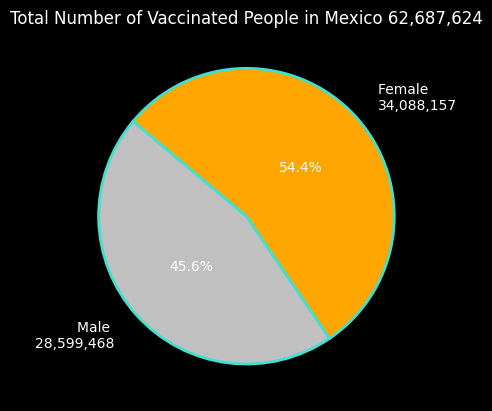

Command:  ld
Insert a country name:  italy


Total deaths:168220  male:55.8%  female:44.2%


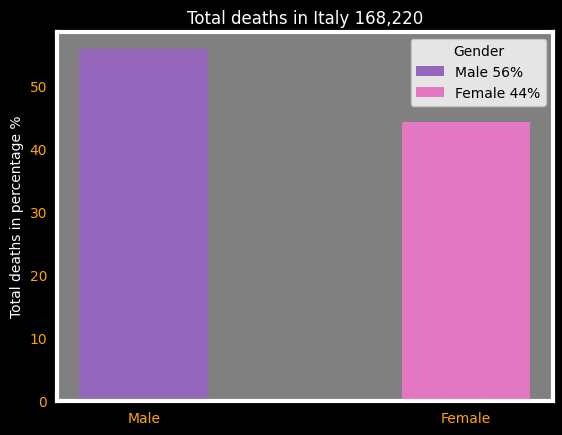

In [ ]:
#main function
def main():
    print()
    print("Covid Analyzer")
    commands()

    while(True):
        command = input("Command: ").lower()

        if(command == "ld"):
            DeathResults()

        elif(command == "fv"):
            VaxResults()

        elif(command == "cmd"):
            commands()

        elif(command == "exit"):
            break

        else:
            print("Invalid command please try again.")
            print()


if __name__ == "__main__":
    main()